<a href="https://colab.research.google.com/github/hafsakhaerunisa/ADM-CASE-02-EDA/blob/main/Percobaan_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-06 16:08:37--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.4’

tau_unsup.py.4      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-06 16:08:37 (132 MB/s) - ‘tau_unsup.py.4’ saved [17387/17387]



In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnum
import umap
import tau_unsup as tau, matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

#1. EDA

In [165]:
df_ice=pd.read_csv('https://raw.githubusercontent.com/hafsakhaerunisa/ADM-CASE-02-EDA/main/ice(2).csv',low_memory = False, encoding='utf8')
pd.DataFrame(df_ice)

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,Menikah,Jakarta,Jarang,Sabtu,Seasalt
1,102,Wanita,32,3606557,86,Menikah,Depok,Jarang,Minggu,Coconut
2,103,Pria,51,15983606,41,Belum Menikah,Tangerang,Sedang,Minggu,Coklat
3,111,Wanita,31,11475409,54,Menikah,Jakarta,NaN,Senin,Coconut
4,112,Pria,36,22508196,92,Menikah,Depok,Tidak Pernah,Jumat,Vanilla


In [166]:
df_ice.drop(columns='ID', inplace=True)
df_ice

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,Menikah,Jakarta,Jarang,Sabtu,Seasalt
1,Wanita,32,3606557,86,Menikah,Depok,Jarang,Minggu,Coconut
2,Pria,51,15983606,41,Belum Menikah,Tangerang,Sedang,Minggu,Coklat
3,Wanita,31,11475409,54,Menikah,Jakarta,NaN,Senin,Coconut
4,Pria,36,22508196,92,Menikah,Depok,Tidak Pernah,Jumat,Vanilla


In [167]:
# Amount of missing values for every colomn
df_ice.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   1
HariFav                 0
FavFlavor               0
dtype: int64

In [168]:
# Proportion Missing Values for every colomn
df_ice.isnull().sum()/df_ice.shape[0]

Jenis Kelamin           0.0
Umur                    0.0
Pendapatan-per-bulan    0.0
skor-pengeluaran        0.0
Menikah                 0.0
Kota                    0.0
Promo                   0.2
HariFav                 0.0
FavFlavor               0.0
dtype: float64

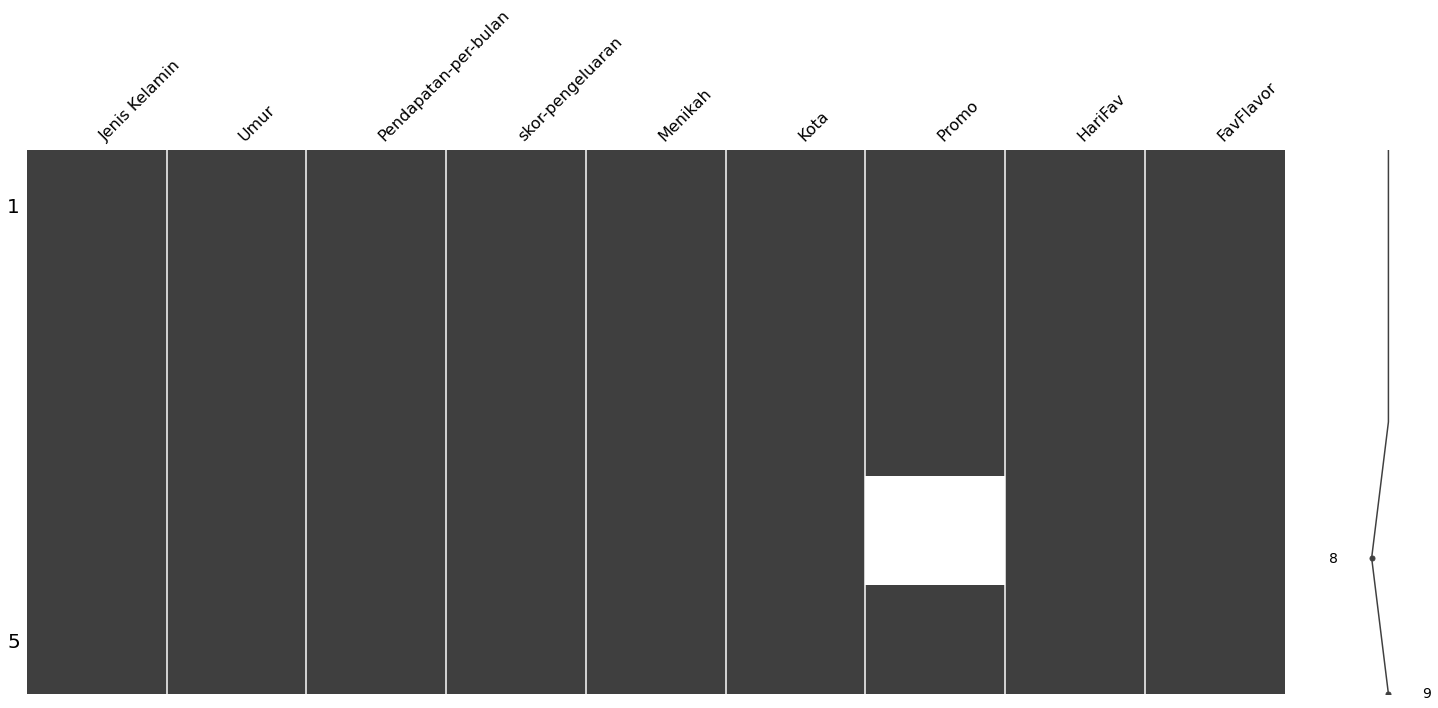

In [169]:
msnum.matrix(df_ice)

In [170]:
df_ice['Promo'] = df_ice['Promo'].fillna(df_ice['Promo'].mode()[0])
df_ice

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,Menikah,Jakarta,Jarang,Sabtu,Seasalt
1,Wanita,32,3606557,86,Menikah,Depok,Jarang,Minggu,Coconut
2,Pria,51,15983606,41,Belum Menikah,Tangerang,Sedang,Minggu,Coklat
3,Wanita,31,11475409,54,Menikah,Jakarta,Jarang,Senin,Coconut
4,Pria,36,22508196,92,Menikah,Depok,Tidak Pernah,Jumat,Vanilla


In [171]:
print(df_ice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Jenis Kelamin         5 non-null      object
 1   Umur                  5 non-null      int64 
 2   Pendapatan-per-bulan  5 non-null      int64 
 3   skor-pengeluaran      5 non-null      int64 
 4   Menikah               5 non-null      object
 5   Kota                  5 non-null      object
 6   Promo                 5 non-null      object
 7   HariFav               5 non-null      object
 8   FavFlavor             5 non-null      object
dtypes: int64(3), object(6)
memory usage: 488.0+ bytes
None


In [172]:
df_ice_menikah = pd.get_dummies(df_ice['Menikah'])
df_ice_menikah.head()

,Belum Menikah,Menikah
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [173]:
df_ice_kota = pd.get_dummies(df_ice['Kota'])
df_ice_kota.head()

,Depok,Jakarta,Tangerang
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0


In [174]:
df_ice_promo = pd.get_dummies(df_ice['Promo'])
df_ice_promo.head()

,Jarang,Sedang,Tidak Pernah
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


In [175]:
df_ice_harifav = pd.get_dummies(df_ice['HariFav'])
df_ice_harifav.head()

,Jumat,Minggu,Sabtu,Senin
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0


In [176]:
df_ice_FavFlavor = pd.get_dummies(df_ice['FavFlavor'])
df_ice_FavFlavor.head()

,Coconut,Coklat,Seasalt,Vanilla
0,0,0,1,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


In [177]:
df_ice.drop(df_ice.columns[5:9],axis=1,inplace=True)
df_ice

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah
0,Wanita,49,13114754,52,Menikah
1,Wanita,32,3606557,86,Menikah
2,Pria,51,15983606,41,Belum Menikah
3,Wanita,31,11475409,54,Menikah
4,Pria,36,22508196,92,Menikah


In [178]:
df_ice.drop(df_ice.columns[0],axis=1,inplace=True)
df_ice

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah
0,49,13114754,52,Menikah
1,32,3606557,86,Menikah
2,51,15983606,41,Belum Menikah
3,31,11475409,54,Menikah
4,36,22508196,92,Menikah


In [179]:
df_ice.drop(df_ice.columns[3],axis=1,inplace=True)
df_ice

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,49,13114754,52
1,32,3606557,86
2,51,15983606,41
3,31,11475409,54
4,36,22508196,92


In [180]:
# Joining databases 
df_full = pd.concat([df_ice,df_ice_menikah,df_ice_kota,df_ice_promo,df_ice_harifav,df_ice_FavFlavor], axis = 1, ignore_index = False)
df_full

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Belum Menikah,Menikah,Depok,Jakarta,Tangerang,Jarang,Sedang,Tidak Pernah,Jumat,Minggu,Sabtu,Senin,Coconut,Coklat,Seasalt,Vanilla
0,49,13114754,52,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,32,3606557,86,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2,51,15983606,41,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,31,11475409,54,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
4,36,22508196,92,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1


In [181]:
print('Duplicated Values :')
print(df_ice.duplicated().sum())

Duplicated Values :
0


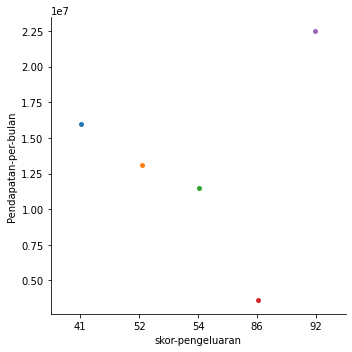

In [183]:
p= sns.catplot(x="skor-pengeluaran", y="Pendapatan-per-bulan", data=df_full)
p

In [184]:
df_full.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Belum Menikah,Menikah,Depok,Jakarta,Tangerang,Jarang,Sedang,Tidak Pernah,Jumat,Minggu,Sabtu,Senin,Coconut,Coklat,Seasalt,Vanilla
count,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,39.800000,1.333770e+07,65.000000,0.200000,0.800000,0.400000,0.400000,0.200000,0.600000,0.200000,0.200000,0.200000,0.400000,0.200000,0.200000,0.400000,0.200000,0.200000,0.200000
std,9.523655,6.879531e+06,22.561028,0.447214,0.447214,0.547723,0.547723,0.447214,0.547723,0.447214,0.447214,0.447214,0.547723,0.447214,0.447214,0.547723,0.447214,0.447214,0.447214
min,31.000000,3.606557e+06,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.147541e+07,52.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,1.311475e+07,54.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.598361e+07,86.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,51.000000,2.250820e+07,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Umur                  5 non-null      int64
 1   Pendapatan-per-bulan  5 non-null      int64
 2   skor-pengeluaran      5 non-null      int64
 3   Belum Menikah         5 non-null      uint8
 4   Menikah               5 non-null      uint8
 5   Depok                 5 non-null      uint8
 6   Jakarta               5 non-null      uint8
 7   Tangerang             5 non-null      uint8
 8   Jarang                5 non-null      uint8
 9   Sedang                5 non-null      uint8
 10  Tidak Pernah          5 non-null      uint8
 11  Jumat                 5 non-null      uint8
 12  Minggu                5 non-null      uint8
 13  Sabtu                 5 non-null      uint8
 14  Senin                 5 non-null      uint8
 15  Coconut               5 non-null      uint8
 16  Coklat      

In [188]:
df_full['Belum Menikah'] = df_full['Belum Menikah'].astype('int64')
df_full['Menikah']= df_full['Menikah'].astype('int64')

In [189]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Umur                  5 non-null      int64
 1   Pendapatan-per-bulan  5 non-null      int64
 2   skor-pengeluaran      5 non-null      int64
 3   Belum Menikah         5 non-null      int64
 4   Menikah               5 non-null      int64
 5   Depok                 5 non-null      uint8
 6   Jakarta               5 non-null      uint8
 7   Tangerang             5 non-null      uint8
 8   Jarang                5 non-null      uint8
 9   Sedang                5 non-null      uint8
 10  Tidak Pernah          5 non-null      uint8
 11  Jumat                 5 non-null      uint8
 12  Minggu                5 non-null      uint8
 13  Sabtu                 5 non-null      uint8
 14  Senin                 5 non-null      uint8
 15  Coconut               5 non-null      uint8
 16  Coklat      